In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multivariate_generators.multivariate_shift_outlier_generator import MultivariateShiftOutlierGenerator
from multivariate_generators.multivariate_trend_outlier_generator import MultivariateTrendOutlierGenerator
from multivariate_generators.multivariate_variance_outlier_generator import MultivariateVarianceOutlierGenerator
from multivariate_generators.multivariate_data_generator import MultivariateDataGenerator
from multivariate_generators.multivariate_extreme_outlier_generator import MultivariateExtremeOutlierGenerator

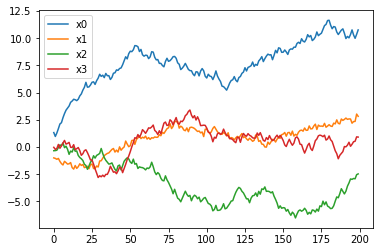

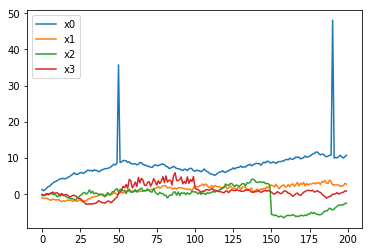

,x0,x1,x2,x3
0,1.330106,-1.000000,-0.340169,-0.027703
1,0.970960,-1.048141,-0.328884,-0.219979
2,1.291141,-1.130170,-0.294970,-0.137106
3,1.688795,-1.047713,-0.040288,0.237230
4,2.117202,-1.322840,0.194228,-0.112417
5,2.236750,-1.527864,0.119021,0.103263
6,2.694172,-1.651377,0.379529,0.367041
7,3.075173,-1.316438,-0.059793,0.605271
8,3.388750,-1.435018,0.077237,0.267150
9,3.581006,-1.571509,-0.211492,0.333058


In [2]:
STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K, shift_config={1: 25, 2:20})
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}],
                      'shift':   [{'n': 1, 'timestamps': [(100,190)]}],
                      'trend':   [{'n': 2, 'timestamps': [(20, 150)]}],
                      'variance':[{'n': 3, 'timestamps': [(50, 100)]}]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()
df

In [3]:
df.corr()

,x0,x1,x2,x3
x0,1.000000,0.392471,-0.293254,0.026119
x1,0.392471,1.000000,-0.370961,0.362678
x2,-0.293254,-0.370961,1.000000,0.194131
x3,0.026119,0.362678,0.194131,1.000000
